In [2]:
import torch

In [4]:
print(torch.__version__)

2.3.1


## BERT - Bidirectional encoder representation from transformers.
### MLM - Masked LM

#### Transformer reads entire sequence of words at once(Bidirectional)

Inputs are sequence of tokens which are first embedded into vectors and then processed in the neural network.
Outputs is a sequence of vetctors in whinch each vector is corresponds to an input token with same index.

#### To avoid prediction of next word in a sequence, bert uses 2 training stratergies.
##### MLM - 
    before feeding word sequences to bert 15% words in a sequence are replaced with a MASK token. The model then tries to predict the original value of masked words based on the context provided by the other words in the sequence. Bert loss function takes into consideration onlly the prediction of masked values and ignores prediction of non-masked values.

##### Next sentence prediction(NSP) -
    Model receives a pairs of sentence as input and learns to predict the second sentence in the pair is subsequent sentence in the original document. During training, 50% of the inputs are a pair in which the second sentence is the subsequent sentence in the original document, while in the other 50% a random sentence from the corpus is chosen as the second sentence. The assumption is that the random sentence will be disconnected from the first sentence.

    the input is processed in the following for model distinguish between the two sentences in training:
        1. A [CLS] token is inserted at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
        2. A sentence embedding indicating Sentence A or Sentence B is added to each token. Sentence embeddings are similar in concept to token embeddings with a vocabulary of 2.
        3. A positional embedding is added to each token to indicate its position in the sequence.


Masked LM and Next Sentence Prediction are trained together, with the goal of minimizing the combined loss function of the two strategies.


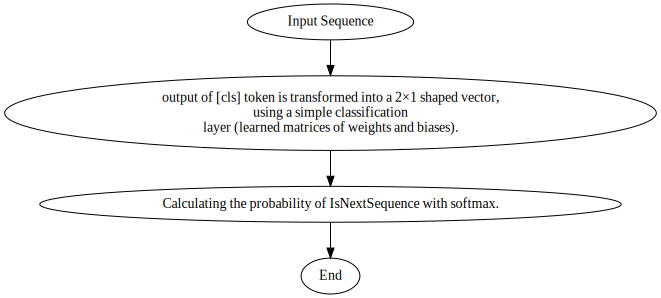

In [3]:
#MLM prediction steps
from graphviz import Digraph
dot = Digraph(comment = "MLM")
nodes = {"input sequence" : "Input Sequence",
        "output" : "output of [cls] token is transformed into a 2×1 shaped vector, \nusing a simple classification \nlayer (learned matrices of weights and biases).",
        "probablity calculation": "Calculating the probability of IsNextSequence with softmax.",
        "end" : "End" }

# Add nodes to the graph
for key, label in nodes.items():
    dot.node(key, label)
# Define the edges between the nodes
edges = [
    ("input sequence", "output"),
    ("output", "probablity calculation"),
    ("probablity calculation", "end")
]

# Add edges to the graph
for edge in edges:
    dot.edge(*edge)

# Render the graph to display in Jupyter Notebook
dot.render('MLM', format='png', cleanup=True)
dot

In [19]:
# NSP predicion steps
from graphviz import Digraph
dot = Digraph(comment = "MLM")
nodes = {"encoder out" : "Encoded output",
        "classification layer" : "Addition of classification layer",
        "out matrix words": "multiply out vectors by embedding matrix,\n transform to vocabulary dimension",
        "softmax" : "calculate the probablity of each word \nin vocabulary with softmax",
        "end" : "End" }

# Add nodes to the graph
for key, label in nodes.items():
    dot.node(key, label)
# Define the edges between the nodes
edges = [
    ("encoder out", "classification layer"),
    ("classification layer", "out matrix words"),
    ("out matrix words", "softmax"),
    ("softmax", "end")
]

# Add edges to the graph
for edge in edges:
    dot.edge(*edge)

# Render the graph to display in Jupyter Notebook
dot.render('MLM', format='png', cleanup=True)
dot


In [ ]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph()

# Define the nodes and their descriptions
nodes = {
    "start": "Start",
    "encoder": "encoder",
    "input_embedding": "Input Embedding\n- Tokenize Text\n- Get Embeddings",
    "positional_embedding": "Positional Embedding\n- Calculate Positional Encoding\n- Add to Embeddings",
    "mha_encoder": "Multi-Head Attention (Encoder)\n- Linear Transformations\n- Scaled Dot-Product Attention\n- Concatenate Heads\n- Feed-Forward Layer\n- Layer Normalization",
    "decoder": "Decoder\n- Output Embedding\n- Multi-Head Attention\n- Encoder-Decoder Attention\n- Feed-Forward Layer\n- Layer Normalization",
    "output": "Output\n- Apply Softmax\n- Generate Probabilities\n- Select Next Word",
    "end": "End"
}

# Add nodes to the graph
for key, label in nodes.items():
    dot.node(key, label)

# Define the edges between the nodes
edges = [
    ("start", "encoder","input_text"),
    ("encoder", "input_embedding"),
    ("input_embedding", "positional_embedding"),
    ("positional_embedding", "mha_encoder"),
    ("mha_encoder", "decoder"),
    ("decoder", "output", "prediction of task"),
    ("output", "end")
]

# Add edges to the graph
for edge in edges:
    dot.edge(*edge)

# Render the graph to display in Jupyter Notebook
dot.render('transformer_flowchart', format='png', cleanup=True)
dot


In [1]:
import json

In [7]:
import pandas as pd
import polars as pl

In [5]:
def import_csv(path:str):
    try:
        data = pd.read_csv(path)
    except:
        data = pl.read_csv|(path)
    print(type(data))
    return data

In [8]:
data_sample = import_csv('Mental_Health_FAQ.csv')
#data_sample = import_csv('train.csv')
#data_sample_1 = data_sample.copy()

<class 'pandas.core.frame.DataFrame'>


In [9]:
data_sample_1 = data_sample.copy()

In [10]:
data_sample.sample(5)

Question_ID                                          Questions  \
91      4824231  What’s the difference between substance use an...   
61      1706961         What's the difference between CBT and DBT?   
57      5981663                                       What is MSP?   
31      4759773  What should I do if I’m worried about a friend...   
14      5343181  If I feel better after taking medication, does...   

                                              Answers  
91  People tend to use the word “addiction” to mea...  
61  CBT (cognitive-behavioural therapy) and DBT (d...  
57  MSP stands for Medical Services Plan. It’s a h...  
31  This may depend on your relationship with them...  
14  It is not uncommon for people to stop taking t...

In [15]:
data_sample_1 = data_sample_1.rename(columns={"Questions": "Context", "Answers": "Response"})
data_sample_1.head()

Question_ID                                            Context  \
0      1590140        What does it mean to have a mental illness?   
1      2110618                    Who does mental illness affect?   
2      6361820                        What causes mental illness?   
3      9434130  What are some of the warning signs of mental i...   
4      7657263            Can people with mental illness recover?   

                                            Response  
0  Mental illnesses are health conditions that di...  
1  It is estimated that mental illness affects 1 ...  
2  It is estimated that mental illness affects 1 ...  
3  Symptoms of mental health disorders vary depen...  
4  When healing from mental illness, early identi...

In [16]:
data_sample.isnull().sum()

Question_ID    0
Questions      0
Answers        0
dtype: int64

In [ ]:
data.head()

In [19]:
data_sample_1["Context"].unique().shape

(98,)

In [20]:
def plot_miss_vals(df, ds_name="df"):
    import matplotlib.pyplot as plt
    import missingno as msno
    msno.matrix(df)
    plt.title(f'Distribution of Missing Values in {ds_name} dataset', fontsize=30, fontstyle='oblique')
    plt.show()

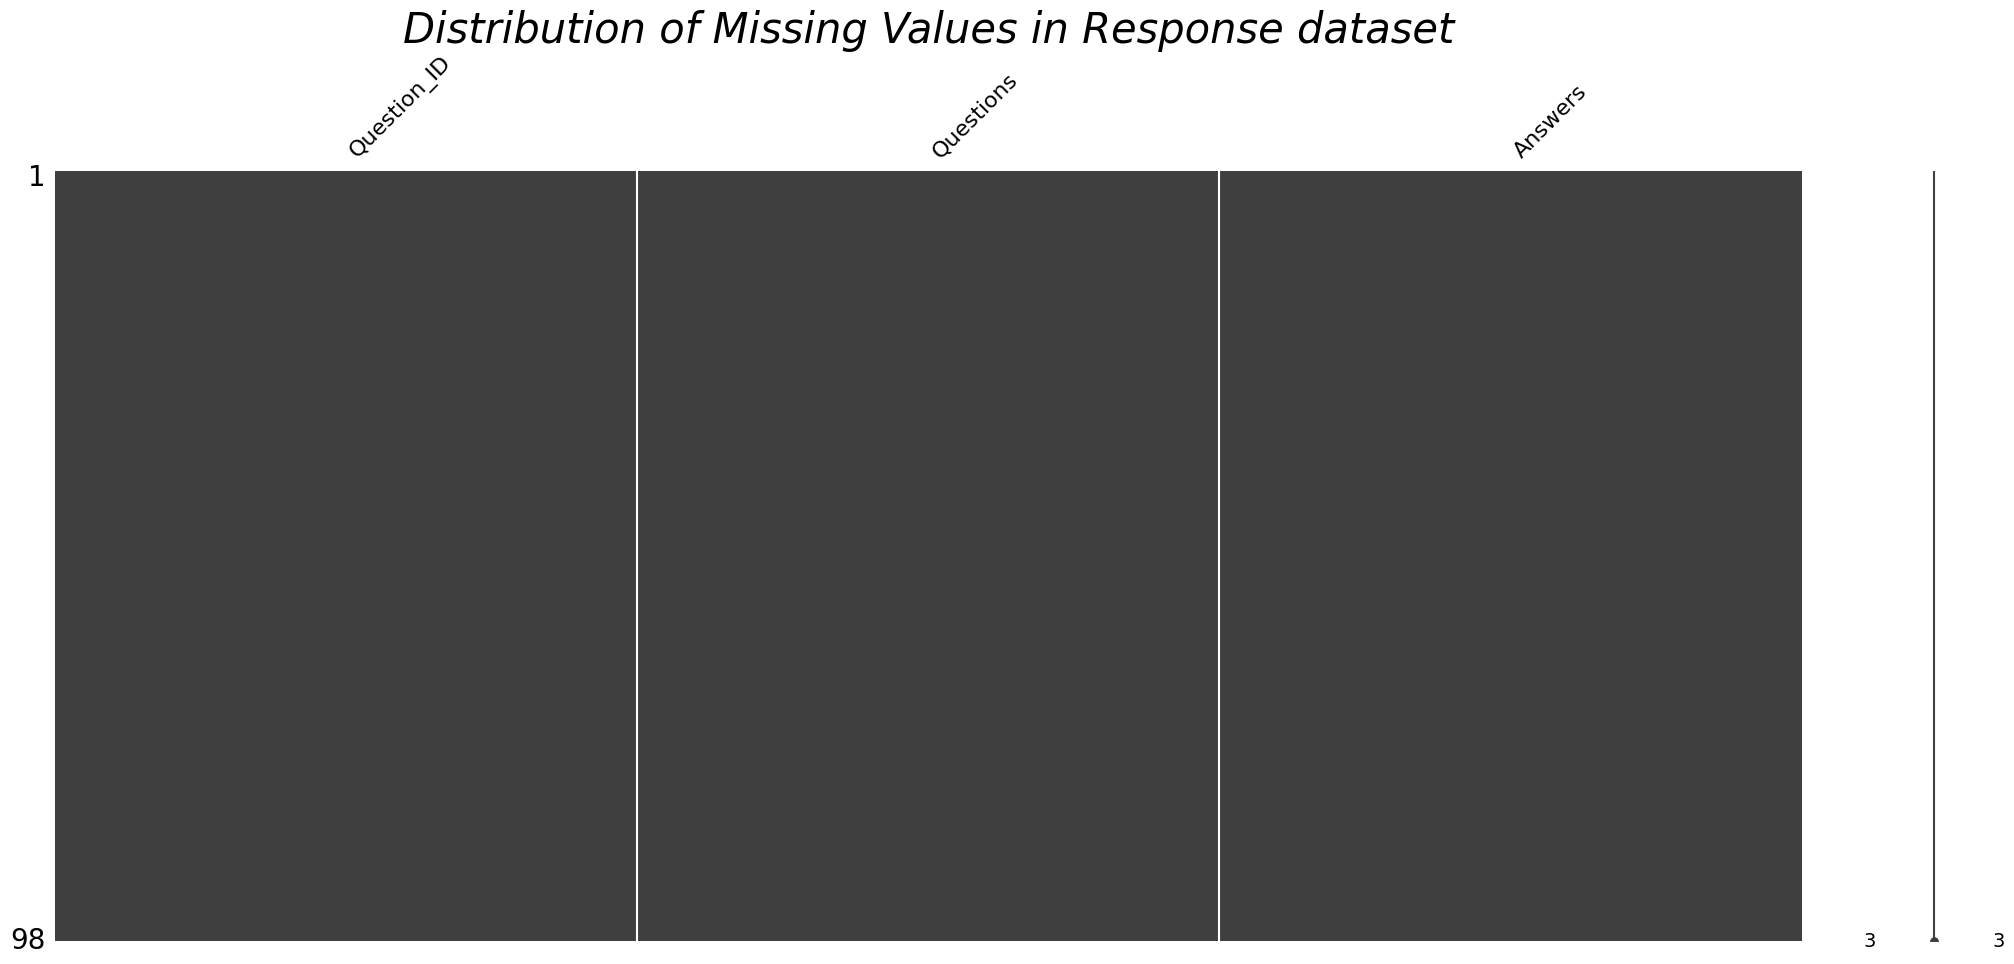

In [21]:
plot_miss_vals(data_sample, "Response")

In [23]:
def get_corpus(series):
    import math
    words = []
    for text in series:
        if isinstance(text, float) and math.isnan(text):
            continue
        for word in text.split():
            words.append(word.strip())
    return words

corpus = get_corpus(data_sample_1.Response)
corpus[:5]

['Mental', 'illnesses', 'are', 'health', 'conditions']

In [24]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'to': 799,
 'and': 765,
 'a': 673,
 'the': 607,
 'of': 518,
 'or': 485,
 'you': 432,
 'your': 326,
 'in': 304,
 'for': 303}

In [26]:
labels = data_sample_1['Context'].unique().tolist()
labels = [s.strip() for s in labels]
labels

['What does it mean to have a mental illness?',
 'Who does mental illness affect?',
 'What causes mental illness?',
 'What are some of the warning signs of mental illness?',
 'Can people with mental illness recover?',
 'What should I do if I know someone who appears to have the symptoms of a mental disorder?',
 'How can I find a mental health professional for myself or my child?',
 'What treatment options are available?',
 'If I become involved in treatment, what do I need to know?',
 'What is the difference between mental health professionals?',
 'How can I find a mental health professional right for my child or myself?',
 'If I become involved in treatment what do I need to know?',
 'Where else can I get help?',
 'What should I know before starting a new medication?',
 'If I feel better after taking medication, does this mean I am "cured" and can stop taking it?',
 'How can I get help paying for my medication?',
 'Where can I go to find therapy',
 'Where can I learn about types of me

In [27]:
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label:id for id, label in enumerate(labels)}

In [28]:
data_sample_1['labels']= data_sample_1['Context'].map(lambda x: label2id[x.strip()])
data_sample_1.head()

Question_ID                                            Context  \
0      1590140        What does it mean to have a mental illness?   
1      2110618                    Who does mental illness affect?   
2      6361820                        What causes mental illness?   
3      9434130  What are some of the warning signs of mental i...   
4      7657263            Can people with mental illness recover?   

                                            Response  labels  
0  Mental illnesses are health conditions that di...       0  
1  It is estimated that mental illness affects 1 ...       1  
2  It is estimated that mental illness affects 1 ...       2  
3  Symptoms of mental health disorders vary depen...       3  
4  When healing from mental illness, early identi...       4

In [29]:
X = list(data_sample_1['Response'])
X[:1]

['Mental illnesses are health conditions that disrupt a personâ€™s thoughts, emotions, relationships, and daily functioning. They are associated with distress and diminished capacity to engage in the ordinary activities of daily life.\nMental illnesses fall along a continuum of severity: some are fairly mild and only interfere with some aspects of life, such as certain phobias. On the other end of the spectrum lie serious mental illnesses, which result in major functional impairment and interference with daily life. These include such disorders as major depression, schizophrenia, and bipolar disorder, and may require that the person receives care in a hospital.\nIt is important to know that mental illnesses are medical conditions that have nothing to do with a personâ€™s character, intelligence, or willpower. Just as diabetes is a disorder of the pancreas, mental illness is a medical condition due to the brainâ€™s biology.\nSimilarly to how one would treat diabetes with medication and 

In [30]:
y = list(data_sample_1['labels'])
y[:5]

[0, 1, 2, 3, 4]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)

In [32]:
X_train[:1]

['Prodrome is a medical term for early signs or symptoms of an illness or health problem that appear before the major signs or symptoms start. \n Psychosis, a group of symptoms found in disorders like schizophrenia, is one illness with a specific prodrome. With psychosis, prodrome signs and symptoms start before full symptoms like hallucinations and delusions appear. \n Common symptoms in the prodrome of psychosis include: \n These symptoms are found in many other mental illnesses, so it isn’t always clear at the time if this is a prodrome of psychosis or schizophrenia or something else. It’s best to seek help whenever you are concerned about your mental health or a loved one’s mental health. Psychosis and schizophrenia are much easier to manage and treat when treatment starts early.']

In [33]:
from transformers import BertForSequenceClassification, BertTokenizer, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

In [34]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Import BERT-base pretrained model
bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(labels), id2label=id2label, label2id = label2id)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
import math
# Ensure all elements are stripped of whitespace

def tokenize(sentences:list):
    # Verify that all elements in sentences are strings
    if isinstance(sentences, list) and all(isinstance(sentence, str) for sentence in sentences):
        # Tokenize the list of sentences
        encoded_inputs = tokenizer.batch_encode_plus(
            sentences,
            padding=True,
            truncation=True,
            return_tensors='pt'
        )
        # print("Encoded Inputs:", encoded_inputs)
    else:
        raise ValueError("Input is not valid. All elements in the list should be strings.")
    return encoded_inputs

In [36]:
full_sentences = [text.strip() for text in X if not isinstance(text, float)]
train_sentences = [text.strip() for text in X_train if not isinstance(text, float)]
test_sentences = [text.strip() for text in X_train if not isinstance(text, float)]

In [37]:
full_data = tokenize(full_sentences)
train_encoding = tokenize(train_sentences)
test_encoding = tokenize(test_sentences)

In [38]:
for key, value in full_data.items():
    print(f"{key} shape: {value.shape}")

input_ids shape: torch.Size([98, 512])
token_type_ids shape: torch.Size([98, 512])
attention_mask shape: torch.Size([98, 512])


In [39]:
train_encoding = tokenizer(X_train, truncation=True, padding=True)
test_encoding = tokenizer(X_test, truncation=True, padding=True)

full_data = tokenizer(X, truncation=True, padding=True)

In [40]:
X[:1]

['Mental illnesses are health conditions that disrupt a personâ€™s thoughts, emotions, relationships, and daily functioning. They are associated with distress and diminished capacity to engage in the ordinary activities of daily life.\nMental illnesses fall along a continuum of severity: some are fairly mild and only interfere with some aspects of life, such as certain phobias. On the other end of the spectrum lie serious mental illnesses, which result in major functional impairment and interference with daily life. These include such disorders as major depression, schizophrenia, and bipolar disorder, and may require that the person receives care in a hospital.\nIt is important to know that mental illnesses are medical conditions that have nothing to do with a personâ€™s character, intelligence, or willpower. Just as diabetes is a disorder of the pancreas, mental illness is a medical condition due to the brainâ€™s biology.\nSimilarly to how one would treat diabetes with medication and 

In [41]:
from torch.utils.data import Dataset

In [42]:
Dataset

torch.utils.data.dataset.Dataset

In [43]:
class DataLoader(Dataset):
    
    def __init__(self, encodings, labels):
        
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
               
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):

        return len(self.labels)

In [44]:
train_dataloader = DataLoader(train_encoding, y_train)
test_dataloader = DataLoader(test_encoding, y_test)

In [45]:
fullDataLoader = DataLoader(full_data, y_test)

In [46]:
def compute_metrics(pred):

    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [47]:
from transformers import TrainingArguments, Trainer


In [48]:
training_args = TrainingArguments(
    output_dir='./output', 
    do_train=True,
    do_eval=True,
    num_train_epochs=100,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=16,
    warmup_steps=100,                
    weight_decay=0.05,
    logging_strategy='steps',
    logging_dir='./multi-class-logs',            
    logging_steps=50,
    eval_strategy="steps",
    eval_steps=50,
    save_strategy="steps", 
    load_best_model_at_end=True
)

In [49]:
trainer = Trainer(
    model=bert,
    args=training_args,                 
    train_dataset=train_dataloader,         
    eval_dataset=test_dataloader,            
    compute_metrics= compute_metrics
)

In [ ]:
trainer.train()

In [ ]:
import numpy

In [29]:
chats = pl.read_csv('train.csv')

In [30]:
chats

shape: (3_512, 2)
┌─────────────────────────────────┬─────────────────────────────────┐
│ Context                         ┆ Response                        │
│ ---                             ┆ ---                             │
│ str                             ┆ str                             │
╞═════════════════════════════════╪═════════════════════════════════╡
│ I'm going through some things … ┆ If everyone thinks you're wort… │
│ I'm going through some things … ┆ Hello, and thank you for your … │
│ I'm going through some things … ┆ First thing I'd suggest is get… │
│ I'm going through some things … ┆ Therapy is essential for those… │
│ I'm going through some things … ┆ I first want to let you know t… │
│ …                               ┆ …                               │
│ My grandson's step-mother send… ┆ Absolutely not! It is never in… │
│ My boyfriend is in recovery fr… ┆ I'm sorry you have tension bet… │
│ The birth mother attempted sui… ┆ The true answer is, "no one ca… │
│ I think adult life is making h… ┆ How do you help yourself to be… │
│ I just took a job that require… ┆ hmm this is a tough one!        │
└─────────────────────────────────┴─────────────────────────────────┘

In [15]:
# Tokenize input and output texts
input_texts = [tokenizer.encode(pair[0], add_special_tokens=False) for pair in dataset]
output_texts = [tokenizer.encode(pair[1], add_special_tokens=False) for pair in dataset]

# Create a TextDataset and DataCollator
text_dataset = TextDataset(tokenizer, input_texts, output_texts)
data_collator = DataCollatorForLanguageModeling(tokenizer, mlm_probability=0.15)

# Set up training arguments and trainer
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=text_dataset,
)

# Train the model
trainer.train()

NameError: name 'dataset' is not defined